In [1]:
%load_ext autoreload
%autoreload 2

import os

os.chdir("./")

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from analysis import format_trades_df, plot_total_nft_volume
import numpy as np

In [22]:
nft_trades = format_trades_df(pd.read_csv("trades.csv", low_memory=False))

In [23]:
nft_profits = nft_trades[["nft_id", "price_usd"]]

In [29]:
nft_profits.pivot_table(index="nft_id", values="price_usd")

,price_usd
nft_id,
0xmons.xyz_103,11937.095
0xmons.xyz_118,32606.400
0xmons.xyz_126,17356.130
0xmons.xyz_127,67375.685
0xmons.xyz_129,45253.635
...,...
merge._9699,1609.415
merge._9700,631.310
merge._9706,2168.895


In [33]:
table = pd.pivot_table(nft_profits, index=["nft_id", "price_usd"], aggfunc=np.sum) 

In [34]:
table

Empty DataFrame
Columns: []
Index: [(0xmons.xyz_103, 11092.14), (0xmons.xyz_103, 12782.05), (0xmons.xyz_118, 15721.68), (0xmons.xyz_118, 49491.12), (0xmons.xyz_126, 10140.18), (0xmons.xyz_126, 24572.08), (0xmons.xyz_127, 55649.83), (0xmons.xyz_127, 79101.54), (0xmons.xyz_129, 19132.05), (0xmons.xyz_129, 71375.22), (0xmons.xyz_134, 3879.22), (0xmons.xyz_134, 9172.4), (0xmons.xyz_139, 7301.15), (0xmons.xyz_139, 12782.05), (0xmons.xyz_139, 26488.96), (0xmons.xyz_148, 10833.05), (0xmons.xyz_148, 26904.5), (0xmons.xyz_152, 12781.79), (0xmons.xyz_152, 81755.52), (0xmons.xyz_157, 78349.04), (0xmons.xyz_157, 95381.44), (0xmons.xyz_158, 10684.75), (0xmons.xyz_158, 26816.15), (0xmons.xyz_158, 60641.73), (0xmons.xyz_16, 2614.5), (0xmons.xyz_16, 73264.9), (0xmons.xyz_16, 99123.1), (0xmons.xyz_160, 38961.36), (0xmons.xyz_160, 74539.84), (0xmons.xyz_162, 5644.79), (0xmons.xyz_162, 17014.79), (0xmons.xyz_162, 55474.88), (0xmons.xyz_165, 5401.5), (0xmons.xyz_165, 19280.47), (0xmons.xyz_178, 39428.74), (0xmons.xyz_178, 82444.08), (0xmons.xyz_184, 14941.22), (0xmons.xyz_184, 71429.16), (0xmons.xyz_185, 8934.65), (0xmons.xyz_185, 37123.44), (0xmons.xyz_185, 63312.21), (0xmons.xyz_186, 15210.64), (0xmons.xyz_186, 43600.35), (0xmons.xyz_190, 7412.28), (0xmons.xyz_190, 51697.65), (0xmons.xyz_193, 30643.95), (0xmons.xyz_193, 31444.82), (0xmons.xyz_204, 68648.71), (0xmons.xyz_204, 75893.18), (0xmons.xyz_214, 4686.75), (0xmons.xyz_214, 48712.3), (0xmons.xyz_214, 61284.2), (0xmons.xyz_217, 3365.4), (0xmons.xyz_217, 35714.58), (0xmons.xyz_231, 5254.79), (0xmons.xyz_231, 25462.51), (0xmons.xyz_24, 7829.88), (0xmons.xyz_24, 8678.54), (0xmons.xyz_25, 7829.88), (0xmons.xyz_25, 8262.12), (0xmons.xyz_25, 9896.82), (0xmons.xyz_250, 52530.12), (0xmons.xyz_250, 52656.12), (0xmons.xyz_253, 3.24), (0xmons.xyz_253, 3.77), (0xmons.xyz_253, 85894.0), (0xmons.xyz_261, 5909.32), (0xmons.xyz_261, 50373.89), (0xmons.xyz_265, 27107.64), (0xmons.xyz_265, 38961.36), (0xmons.xyz_265, 66031.31), (0xmons.xyz_273, 25141.32), (0xmons.xyz_273, 50208.34), (0xmons.xyz_273, 51477.0), (0xmons.xyz_274, 55291.17), (0xmons.xyz_274, 60335.8), (0xmons.xyz_289, 5033.11), (0xmons.xyz_289, 62586.99), (0xmons.xyz_289, 74942.56), (0xmons.xyz_30, 64246.68), (0xmons.xyz_30, 76147.52), (0xmons.xyz_31, 19657.02), (0xmons.xyz_31, 51716.4), (0xmons.xyz_316, 3775.78), (0xmons.xyz_316, 29525.26), (0xmons.xyz_319, 9015.92), (0xmons.xyz_319, 57698.39), (0xmons.xyz_319, 78349.04), (0xmons.xyz_322, 18974.58), (0xmons.xyz_322, 66800.35), (0xmons.xyz_325, 3209.41), (0xmons.xyz_325, 28857.84), (0xmons.xyz_333, 29321.68), (0xmons.xyz_333, 74942.56), (0xmons.xyz_336, 3398.2), (0xmons.xyz_336, 6054.27), (0xmons.xyz_47, 4686.75), (0xmons.xyz_47, 17557.47), (0xmons.xyz_55, 26880.66), (0xmons.xyz_55, 67788.95), ...]

[434046 rows x 0 columns]

In [10]:
%%time
df_list = []
for nft in list(nft_profits["nft_id"].unique())[:100]:
    df = nft_profits[nft_profits["nft_id"] == nft].set_index("nft_id")
    df_list.append(df.pct_change())

CPU times: user 5.9 s, sys: 22.5 ms, total: 5.93 s
Wall time: 5.96 s


In [13]:
nft_profits.assign(profit=nft_profits["price_usd"].pct_change())

,nft_id,price_usd,profit
0,0xmons.xyz_103,11092.14,NaN
1,0xmons.xyz_103,12782.05,0.152352
2,0xmons.xyz_118,15721.68,0.229981
3,0xmons.xyz_118,49491.12,2.147954
4,0xmons.xyz_126,10140.18,-0.795111
...,...,...,...
437168,merge._9706,2327.69,0.157997
437169,merge._9780,3417.16,0.468048
437170,merge._9780,2211.10,-0.352942
437171,merge._9956,1505.54,-0.319099


In [ ]:
profits

In [ ]:
nft_trade_list = sorted(list(nft_profits.index))
nfts = sorted([*set(nft_trade_list)])

In [32]:
trade_count = nft_profits["nft_id"].value_counts()

In [44]:
trade_count.sort_values().reset_index()

,index,nft_id
0,The Surreals_6149,2
1,Boonji Project_3164,2
2,Boonji Project_3147,2
3,Boonji Project_3145,2
4,Boonji Project_3139,2
...,...,...
164190,The Art of Seasons_11771,13
164191,OGCR_6314,13
164192,BoredApeYachtClub_2408,13
164193,RareApepeYachtClub_4701,14


In [5]:
nft_trades

,date,nft_id,price_eth,price_usd,NFT,Buyer
0,2021-03-14,0xmons.xyz_103,6.000,11092.14,0xmons.xyz,0xfaf1031b02a994b80f12cc1ee4c0dcebbb946aa0
1,2021-08-01,0xmons.xyz_103,5.000,12782.05,0xmons.xyz,0x73ffce54ce7d21397a7932d9bc2a7e013ff30902
2,2021-04-01,0xmons.xyz_118,7.990,15721.68,0xmons.xyz,0x2117c37a65ad3c0489682386f7d81d4c6d08b3c8
3,2021-12-04,0xmons.xyz_118,12.000,49491.12,0xmons.xyz,0x947e1bbcbf8a67a9f7a393adf93179baaf0cccdc
4,2021-03-11,0xmons.xyz_126,5.550,10140.18,0xmons.xyz,0xfaf1031b02a994b80f12cc1ee4c0dcebbb946aa0
...,...,...,...,...,...,...
437168,2021-12-15,merge._9706,0.579,2327.69,merge.,0xf4fede498847004d74664f5b496334e966152cc2
437169,2021-12-15,merge._9780,0.850,3417.16,merge.,0x7220525b1522323b43073e18e43dfe961528e65b
437170,2021-12-15,merge._9780,0.550,2211.10,merge.,0x7784981924567c0aa2c0c3e17ce9b1ee309e5701
437171,2021-12-18,merge._9956,0.380,1505.54,merge.,0x7c5e786f516c7c29521def747bbef5f8b397c909


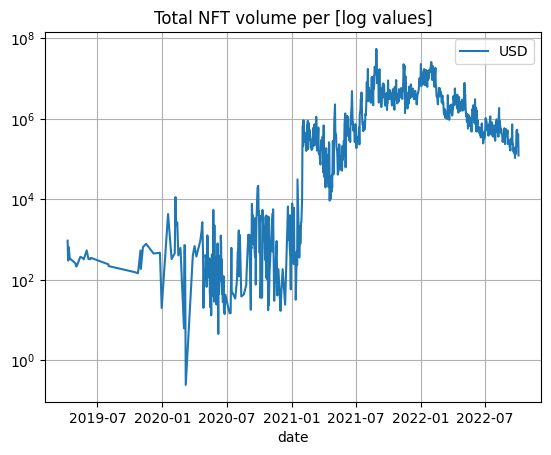

In [6]:
plot_total_nft_volume(nft_trades)

# Plot

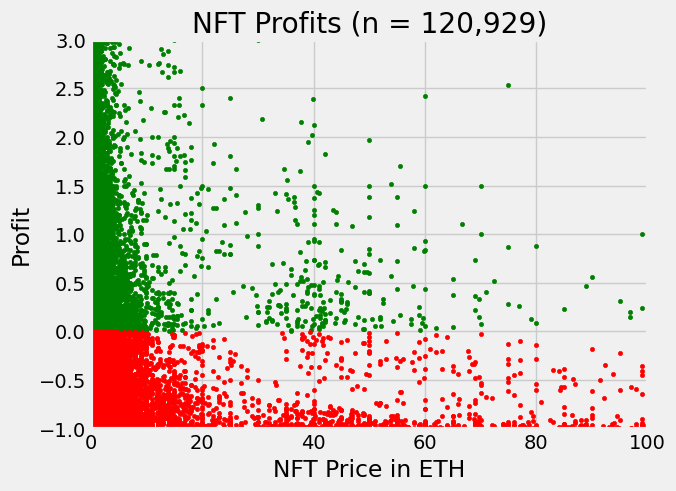

In [60]:
pos_profit = nft_profits[nft_profits["profit"] > 0][["first_trade", "profit"]]
neg_profit = nft_profits[nft_profits["profit"] < 0][["first_trade", "profit"]]

plt.style.use("fivethirtyeight")

plt.scatter(x=pos_profit.first_trade, y=pos_profit.profit, color="g", marker=".")
plt.scatter(x=neg_profit.first_trade, y=neg_profit.profit, color="r", marker=".")

plt.title("NFT Profits (n = 120,929)")

plt.ylabel("Profit")
plt.xlabel("NFT Price in ETH")

plt.xlim(0, 100)
plt.ylim(-1, 3)

plt.savefig("nft_profits.png", dpi=100, bbox_inches="tight")

plt.show()

# Cluster

In [14]:
nft_profits["timedelta"] = pd.to_datetime(
    nft_profits["second_timestamp"]
) - pd.to_datetime(nft_profits["first_timestamp"])

In [24]:
sorted(pd.to_datetime(nft_profits["first_timestamp"]).dt.date.unique())

[datetime.date(2019, 5, 22),
 datetime.date(2019, 7, 30),
 datetime.date(2019, 10, 14),
 datetime.date(2019, 10, 24),
 datetime.date(2020, 2, 12),
 datetime.date(2020, 2, 21),
 datetime.date(2020, 3, 3),
 datetime.date(2020, 3, 5),
 datetime.date(2020, 3, 6),
 datetime.date(2020, 3, 7),
 datetime.date(2020, 3, 24),
 datetime.date(2020, 4, 6),
 datetime.date(2020, 4, 19),
 datetime.date(2020, 4, 22),
 datetime.date(2020, 4, 27),
 datetime.date(2020, 5, 24),
 datetime.date(2020, 5, 29),
 datetime.date(2020, 6, 1),
 datetime.date(2020, 6, 3),
 datetime.date(2020, 6, 6),
 datetime.date(2020, 6, 12),
 datetime.date(2020, 6, 13),
 datetime.date(2020, 6, 15),
 datetime.date(2020, 6, 17),
 datetime.date(2020, 6, 18),
 datetime.date(2020, 6, 22),
 datetime.date(2020, 6, 23),
 datetime.date(2020, 7, 2),
 datetime.date(2020, 7, 9),
 datetime.date(2020, 7, 12),
 datetime.date(2020, 7, 14),
 datetime.date(2020, 7, 25),
 datetime.date(2020, 7, 30),
 datetime.date(2020, 8, 1),
 datetime.date(2020, 8,

In [16]:
nft_profits[nft_profits["timedelta"] < timedelta(0)]

,nft_id,first_trade,second_trade,first_timestamp,second_timestamp,profit,timedelta
63,#LetsWalk_13,5.000,2.0000,2021-08-08 05:02:03,2021-08-05 06:38:38,-0.600000,-3 days +01:36:35
64,#LetsWalk_14,4.200,3.0000,2021-08-20 15:40:11,2021-08-05 20:16:37,-0.285714,-15 days +04:36:26
66,#LetsWalk_17,1.200,0.5000,2021-08-06 05:53:09,2021-07-18 18:01:12,-0.583333,-19 days +12:08:03
67,#LetsWalk_18,0.500,0.8000,2021-07-21 22:24:44,2021-07-20 21:24:45,0.600000,-2 days +23:00:01
76,0xafb44cef938b1be600a4331bf9904f6cec2fcac3_102...,1.683,1.0305,2021-11-08 21:21:29,2021-11-08 21:05:31,-0.387701,-1 days +23:44:02
...,...,...,...,...,...,...,...
120918,merge._935,2.600,0.6700,2022-03-10 13:43:08,2021-12-27 13:54:50,-0.742308,-73 days +00:11:42
120919,merge._9444,0.349,0.3700,2022-04-24 22:58:23,2022-03-08 12:07:06,0.060172,-48 days +13:08:43
120920,merge._9622,0.400,0.2500,2022-04-01 00:25:29,2022-03-09 01:27:18,-0.375000,-23 days +01:01:49
120921,merge._9637,0.360,0.6600,2022-04-28 17:33:59,2022-04-05 08:36:13,0.833333,-24 days +15:02:14


In [ ]:
# 0 - 0.5 ETH

In [ ]:
# 0.5 - 1 ETH

In [ ]:
# 1 - 10 ETH

In [ ]:
# > 10 ETH